In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
train_df = pd.read_csv('/kaggle/input/digitrecognition/train.csv')
test_df = pd.read_csv('/kaggle/input/digitrecognition/test.csv')

In [67]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
train_df.shape

(42000, 785)

In [69]:
y = train_df["label"]
X = train_df.drop(labels=["label"], axis=1)

In [72]:
digit_counts = y.value_counts()
digit_counts

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

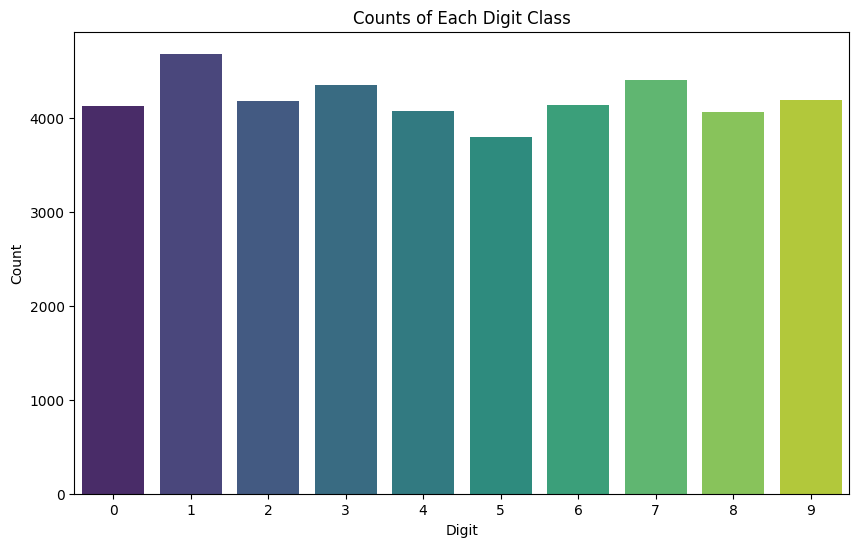

In [74]:
# Plot the count plot with Viridis palette
plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Counts of Each Digit Class")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

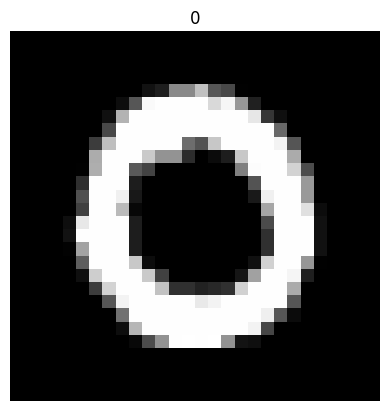

In [76]:
# Plot the 2nd sample
img = X.iloc[1].values  
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_df.iloc[1,0])
plt.axis("off")
plt.show()

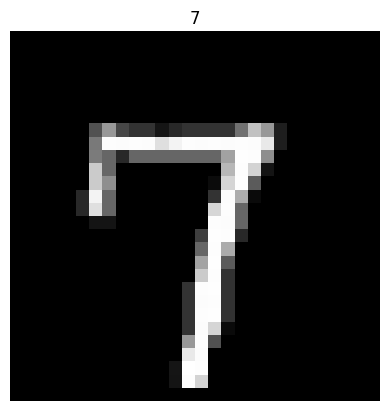

In [77]:
# Plot the 7th sample
img = X.iloc[6].values  
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_df.iloc[6,0])
plt.axis("off")
plt.show()

## Normalization, Reshape and Label Encoding
### Normalization
-----We perform a grayscale normalization to reduce the effect of illumination's differences.

-----If we perform normalization, CNN works faster.

### Reshape
-----Train and test images (28 x 28)

-----We reshape all data to 28x28x1 3D matrices.

-----Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

### Label Encoding
----Encode labels to one hot vectors

-------------2 => [0,0,1,0,0,0,0,0,0,0]

-------------4 => [0,0,0,0,1,0,0,0,0,0]

In [78]:
# Normalize the data
X = X / 255.0
test_df = test_df / 255.0

In [79]:
# Reshape the data
X = X.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

In [80]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Train Test Split
We split the data into train and test sets.

test size is 20%.

train size is 80%.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=2)

In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.utils import to_categorical

# Convert labels to one-hot encoding
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)

# Define the model architecture
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val), verbose=1)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.7206 - loss: 0.8540 - val_accuracy: 0.9580 - val_loss: 0.1321
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9381 - loss: 0.1988 - val_accuracy: 0.9708 - val_loss: 0.0909
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9544 - loss: 0.1463 - val_accuracy: 0.9754 - val_loss: 0.0792
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9587 - loss: 0.1266 - val_accuracy: 0.9798 - val_loss: 0.0638
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9648 - loss: 0.1109 - val_accuracy: 0.9801 - val_loss: 0.0611
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.9711 - loss: 0.0948 - val_accuracy: 0.9823 - val_loss: 0.0541
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9732 - loss: 0.0850 - val_accuracy: 0.9830 - val_loss: 0.0525
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9744 - loss: 0.0779 - 

## Evaluate the model

Test Loss visualization

Confusion matrix

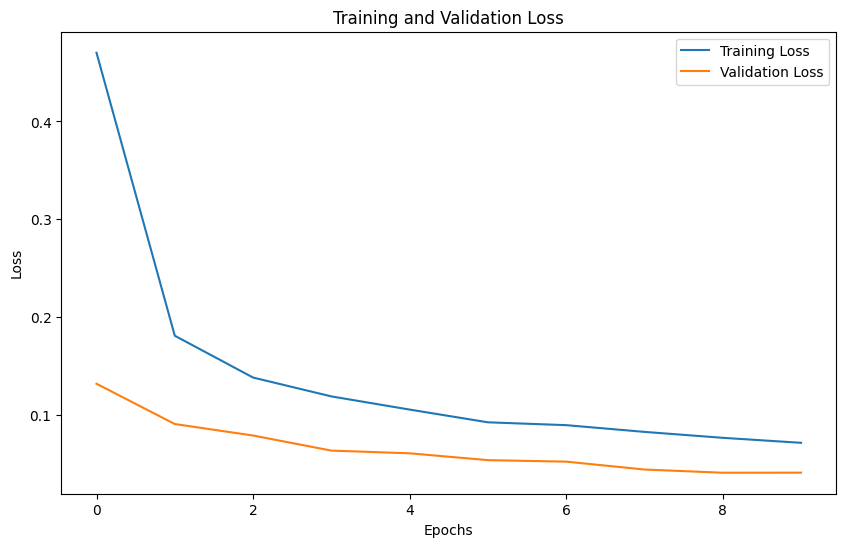

In [84]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


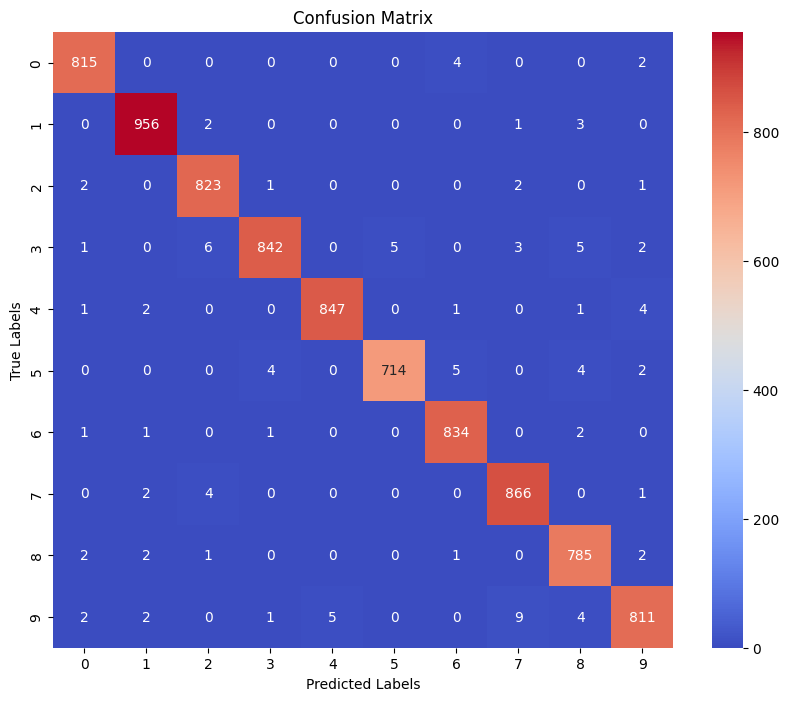

In [86]:
# Predict probabilities for each class
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()